In [ ]:
#using https://arc-alkali-rydberg-calculator.readthedocs.io/en/latest/ARC_3_0_introduction.html#Preliminaries:-general-note-on-using-ARC-with-Alkaline-Earths
# first we install most recent upgrade of arc
!pip install ARC-Alkali-Rydberg-Calculator --upgrade --no-cache-dir

In [1]:
from arc import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
atom = Calcium40()
print("QD")
atom.getQuantumDefect(6,3,3,0)



QD


0.09128082390826674

In [8]:
atom = Calcium40(preferQuantumDefects=True)
atom.getEnergy(56, 2, 2, s=0)

-0.004338490588169279

Found  2254  states.
Generating matrix...
100%

Finding eigenvectors...
100%

plotting...


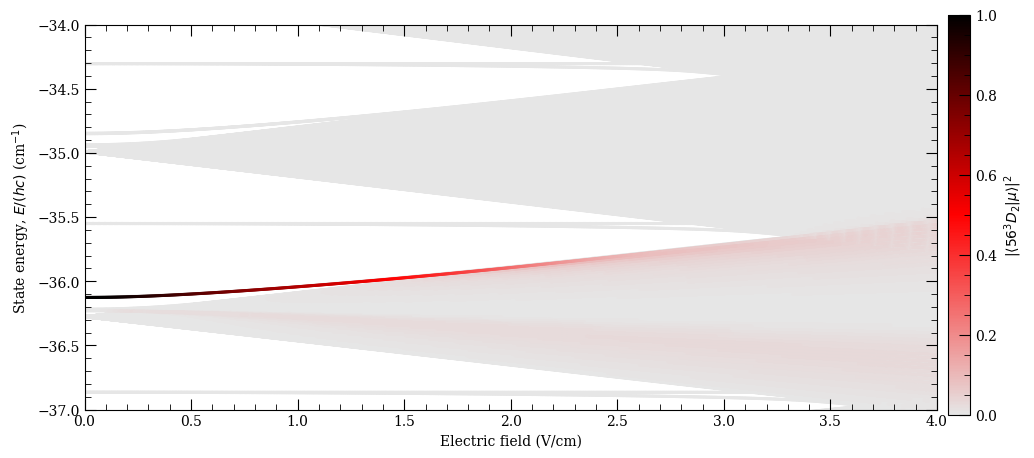

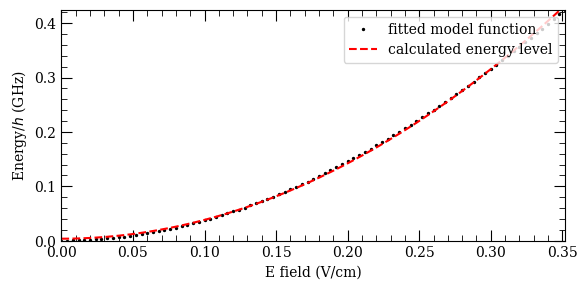

-6934.87098 MHz cm^2 / V^2 


In [20]:
## Stark Map

calc = StarkMap(Calcium40())

# Target state
n0 = 56
l0 = 2
j0 = 2
mj0 = 0
# Define max/min n values in basis
nmin = n0 - 7
nmax = n0 + 7
# Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax = 55

# Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True, s=1)

Emin = 0.0  # Min E field (V/m)
Emax = 4.0e2  # Max E field (V/m)
N = 1001  # Number of Points

# Generate Stark Map
calc.diagonalise(np.linspace(Emin, Emax, N), progressOutput=True)
# Show Sark Map
calc.plotLevelDiagram(progressOutput=True, units=0, highlightState=True)
calc.ax.set_ylim(-37,-34 )
calc.showPlot(interactive=False)
# Return Polarizability of target state
print(
    "%.5f MHz cm^2 / V^2 "
    % calc.getPolarizability(showPlot=True, minStateContribution=0.9)
)